In [1]:
#tabular data imports :
import pandas as pd
import numpy as np
import env
from env import username, password, host
from pydataset import data

# visualization imports:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
# success metrics from earlier in the week: mean squared error and r^2 explained variance
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
#stats
from scipy.stats import pearsonr, spearmanr
from scipy.stats import shapiro

import wrangle as w
import explore as e
import warnings
warnings.filterwarnings("ignore")
import os
directory = os.getcwd()

In [2]:
concrete = pd.read_csv('concrete.csv')
df = w.prepared_concrete_data(concrete)
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,total_lbs_per_yd^3
sample,,,,,,,,,,
0,311.512806,467.379440,0.000000,448.640170,0.000000,2142.449716,1650.158070,28,4335.18582,5020.0
1,372.360318,93.034964,274.034266,348.991346,23.809896,2382.753296,1755.318444,14,3409.84338,5250.0
2,551.155000,0.000000,210.982134,413.145788,12.125410,2109.600878,1898.618744,28,4238.01036,5196.0
3,586.428920,251.326680,0.000000,502.653360,0.000000,2054.705840,1477.095400,28,6649.99230,4872.0
4,341.275176,404.327308,0.000000,426.153046,20.062042,2309.118988,1535.958754,28,2652.74502,5037.0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,619.868297,230.396821,224.871240,424.113772,601.640798,771.617000,1190.494800
slag,1030.0,162.912214,190.213162,0.000000,0.000000,48.501640,315.150429,792.340428
ash,1030.0,119.464719,141.089075,0.000000,0.000000,0.000000,260.806546,441.144462
water,1030.0,400.286860,47.077937,268.522716,363.541838,407.854700,423.287040,544.541140
superplastic,1030.0,13.678918,13.170050,0.000000,0.000000,14.109568,22.487124,70.988764
coarseagg,1030.0,2144.916536,171.417922,1765.900620,2054.705840,2134.072160,2269.435828,2524.289900
fineagg,1030.0,1705.451010,176.757569,1309.544280,1611.466989,1718.501290,1816.606880,2188.305812
age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
strength,1030.0,5194.965451,2422.967403,337.938540,3438.850980,4995.833910,6691.328130,11980.138800
total_lbs_per_yd^3,1030.0,5166.579612,144.095702,4838.000000,5051.250000,5179.000000,5270.000000,5624.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1030 entries, 0 to 1029
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              1030 non-null   float64
 1   slag                1030 non-null   float64
 2   ash                 1030 non-null   float64
 3   water               1030 non-null   float64
 4   superplastic        1030 non-null   float64
 5   coarseagg           1030 non-null   float64
 6   fineagg             1030 non-null   float64
 7   age                 1030 non-null   int64  
 8   strength            1030 non-null   float64
 9   total_lbs_per_yd^3  1030 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 88.5 KB


In [5]:
# checking for possible categorical features
df.nunique()

cement                278
slag                  185
ash                   156
water                 195
superplastic          111
coarseagg             284
fineagg               302
age                    14
strength              845
total_lbs_per_yd^3    255
dtype: int64

In [6]:
cols = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength', 'total_lbs_per_yd^3']

## EXPLORE
### Univariate

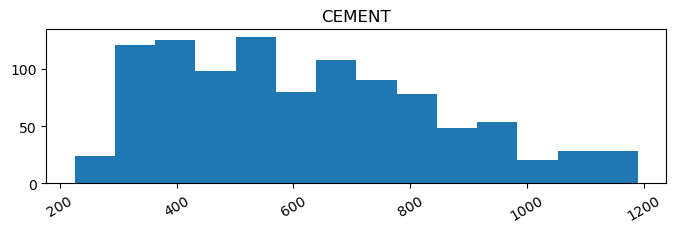

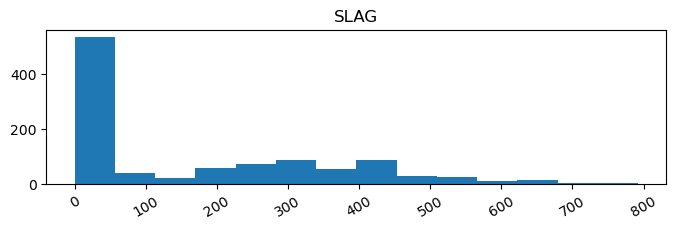

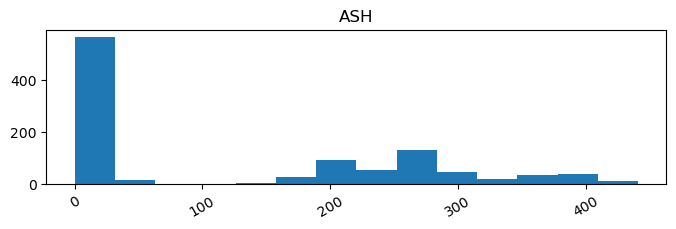

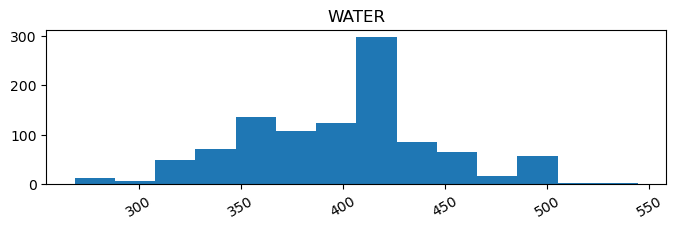

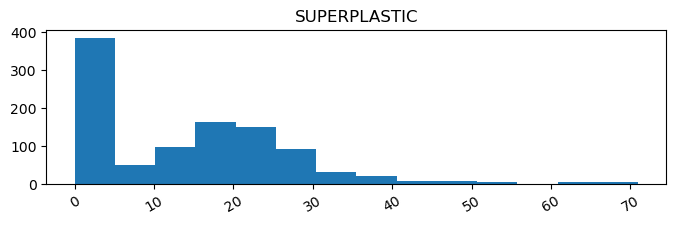

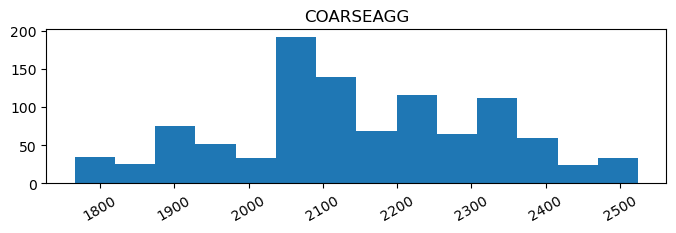

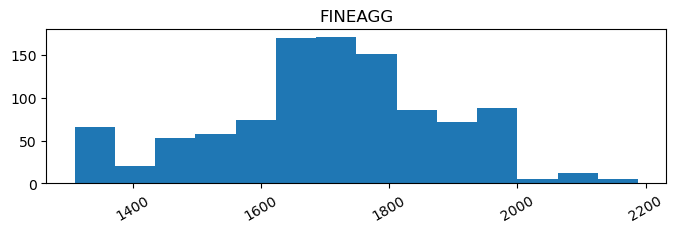

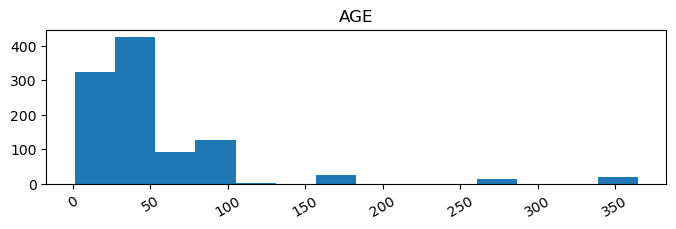

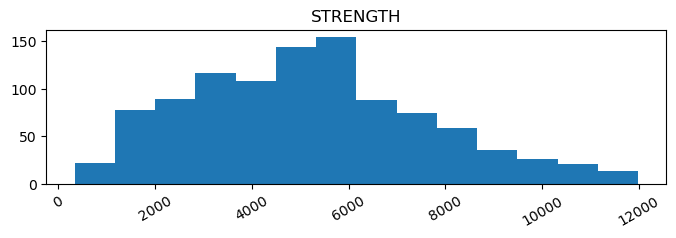

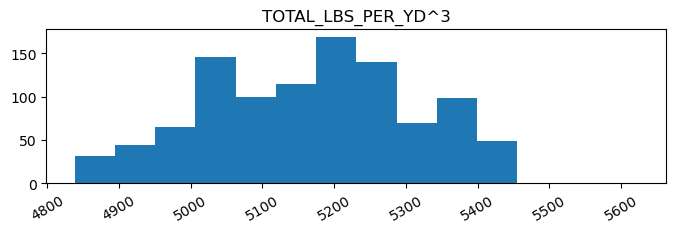

In [7]:
# Set a larger size for individual plots
individual_fig_size = (8, 2)

for col in cols:
    plt.figure(figsize=individual_fig_size)
    plt.title(col.upper()) # Convert title to uppercase
    df[col].hist(bins=14)
    plt.xticks(rotation=30)  # Rotate x-axis labels by 45 degrees
    plt.grid(False)
    plt.show()  # Show each plot individually

In [8]:
df.strength.describe()

count     1030.000000
mean      5194.965451
std       2422.967403
min        337.938540
25%       3438.850980
50%       4995.833910
75%       6691.328130
max      11980.138800
Name: strength, dtype: float64

In [9]:
train, validate, test = e.split_data(df)


    train -> (618, 10)
    validate -> (206, 10)
    test -> (206, 10)


In [10]:
train.head(3)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,total_lbs_per_yd^3
sample,,,,,,,,,,
600,610.67974,0.0000,0.00000,421.08242,0.000000,2134.07216,1887.15472,3,1647.63168,5053.0
160,729.72922,0.0000,0.00000,423.28704,0.000000,2156.11836,1818.81150,28,4561.44510,5128.0
854,853.18794,44.0924,207.23428,346.12534,25.573592,2067.93356,1862.90390,3,5042.97126,5407.0


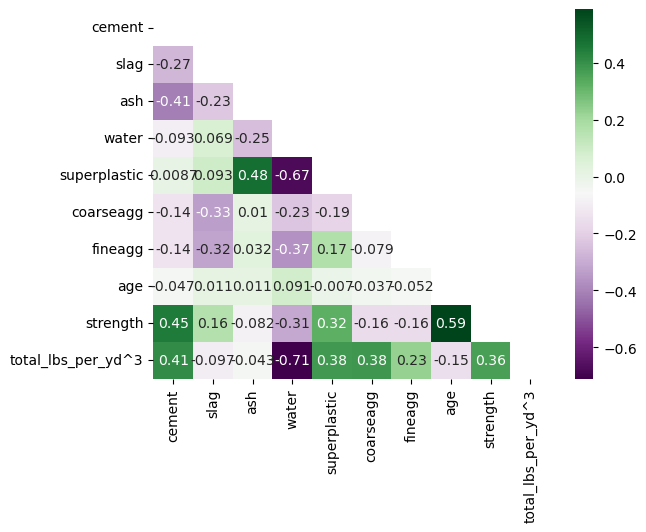

In [11]:
concrete_corr = train.corr(method='spearman')
# pass my correlation matrix to Seaborn's heatmap with customization
sns.heatmap(concrete_corr, cmap='PRGn', annot=True, 
            mask=np.triu(concrete_corr))
plt.show();